In [ ]:
import keras
import pandas as pd

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data.shape
pd.DataFrame(train_labels)

,0
0,1
1,0
2,0
3,1
4,0
...,...
24995,1
24996,0
24997,0
24998,1


In [ ]:
test_data.shape

(25000,)

In [ ]:
train_labels[0]

1

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict([value, key] for (key, value) in word_index.items())

In [ ]:
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
# 데이터 준비
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences),dimension))
  
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

# Data의 Encoding
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [ ]:
print(X_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [ ]:
temp = enumerate(['A', 'B', 'C'])
next(temp)
next(temp)
next(temp)

(2, 'C')

In [ ]:
# float 타입으로 변화 int는 소수점이 없어서
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
from tensorflow.keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr=0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (X_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.5129 - accuracy: 0.7945 - val_loss: 0.3884 - val_accuracy: 0.8746
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3082 - accuracy: 0.9041 - val_loss: 0.3103 - val_accuracy: 0.8856
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2252 - accuracy: 0.9289 - val_loss: 0.3081 - val_accuracy: 0.8753
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1763 - accuracy: 0.9441 - val_loss: 0.2775 - val_accuracy: 0.8876
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1454 - accuracy: 0.9529 - val_loss: 0.2929 - val_accuracy: 0.8853
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1201 - accuracy: 0.9628 - val_loss: 0.2929 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0980 - accuracy: 0.9711 - val_loss: 0.3263 - val_accuracy: 0.8809
Epoch 8/20
30

In [ ]:
# 실험 데이터 결과
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

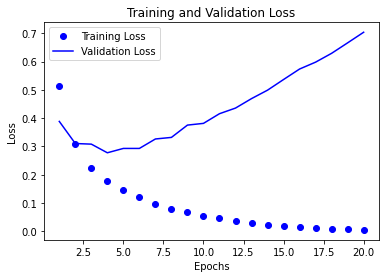

In [ ]:
# 결과 시각화

import matplotlib.pyplot as plt
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b-', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

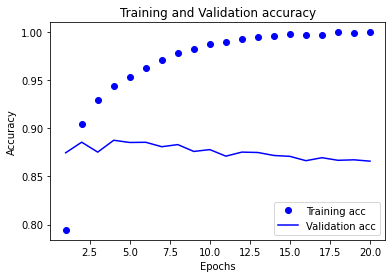

In [ ]:
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b-', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs = 3,
                    batch_size = 512,
                    validation_data = (X_val, y_val))

Epoch 1/3
30/30 [==============================] - 2s 51ms/step - loss: 0.1919 - accuracy: 0.9412 - val_loss: 0.2749 - val_accuracy: 0.8899
Epoch 2/3
30/30 [==============================] - 1s 40ms/step - loss: 0.1567 - accuracy: 0.9529 - val_loss: 0.2762 - val_accuracy: 0.8883
Epoch 3/3
30/30 [==============================] - 1s 39ms/step - loss: 0.1307 - accuracy: 0.9600 - val_loss: 0.2952 - val_accuracy: 0.8818


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

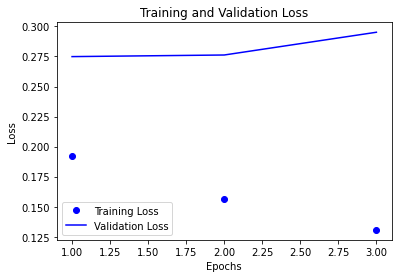

In [ ]:
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b-', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

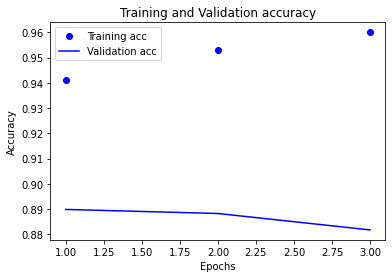

In [ ]:
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b-', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()